In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal
import Fit

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *
from Fit import *

2023-09-24 09:28:16.522114: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-24 09:28:16.701056: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-09-24 09:28:16.716310: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload

In [25]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
reload(Fit)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *
from Fit import *

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [7]:
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

In [20]:
ROOT_PATH = current_folder = globals()['_dh'][0]
FIT_SAVE_PATH = os.path.join(ROOT_PATH, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")
PLOT_PATH = os.path.join(PLOT_PATH_ROOT, "paper_plots/")

In [21]:
SXSnum = "0305"
l = 2
m = 2

h, Mf, af, Level, retro = get_waveform_SXS(SXSnum, l, m)

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [31]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = mode_list(['2.2.0', '2.2.1', '3.2.0'],
                                   Mf, af, retro = retro)
nonconvergence_cut = False

run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}"

In [39]:
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = 0,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            fit_save_prefix = '/home/mcheung1/.jaxqualin_save/fit',
                            run_string_prefix = run_string_prefix)

In [40]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_2.2.0_2.2.1_3.2.0_t0_0.0000_50.0000_501 from an old run.


In [41]:
result = fitter.result_full

In [42]:
popt_full = result.popt_full

In [43]:
collapsed = np.full(popt_full.shape[1], False)

for i in range(popt_full.shape[1]-1):
    diff = popt_full[:,i+1] - popt_full[:,i] 
    collapsed[i+1] = np.all(np.abs(diff) < 1e-15)
    

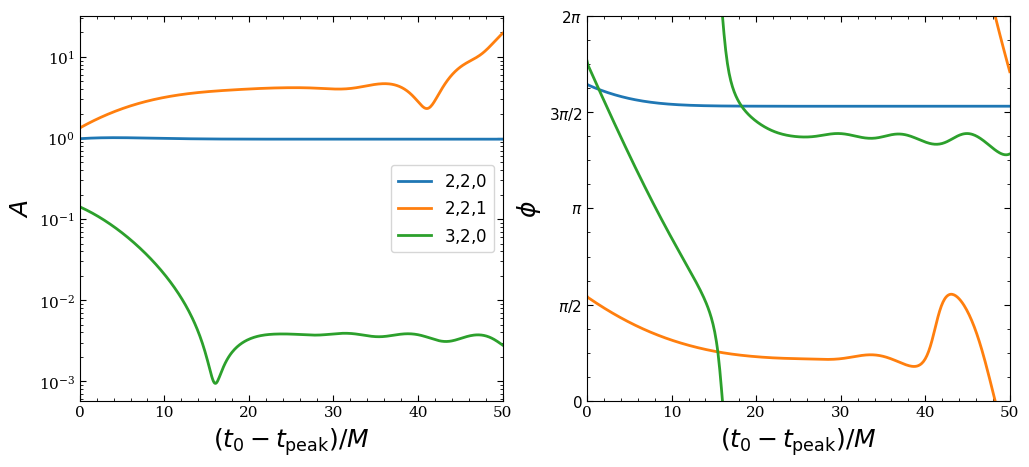

In [44]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0])
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], legend = False)

In [47]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1_3.2.0_3.3.0_4.4.0_2.1.0_"
                                  "2.-2.0_3.-2.0_constant",
                                   Mf, af)
nonconvergence_cut = False

run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}"

In [48]:
fitter = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = 0,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = True,
                            initial_num = 10)

In [49]:
fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_0_fix_2.-2.0_2.1.0_2.2.0_2.2.1_3.-2.0_3.2.0_3.3.0_4.4.0_constant_t0_0.0000_50.0000_501 from an old run.


In [50]:
result = fitter.result_full

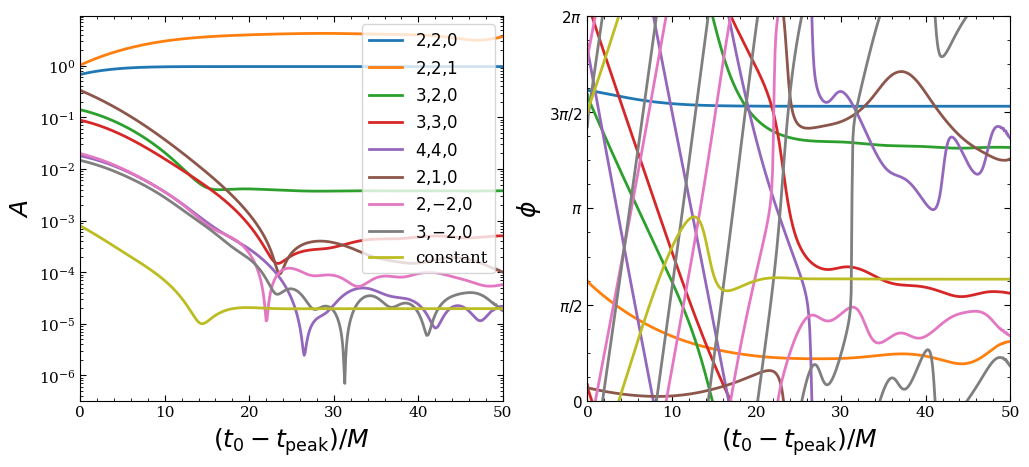

In [51]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
plot_amplitudes(result, fixed_modes = qnm_fixed_list, ax = axs[0])
plot_phases(result, fixed_modes = qnm_fixed_list, ax = axs[1], legend = False)